**Fourier Optics** Holly C Gibbs, Ph.D.

**Exercise 1: Fourier transforms in 1-D** Fourier Optics explores how light interacts with objects in a way that relates to spatial frequency and how plane waves can be basis functions to reconstruct a wide variety of optical signals. To begin exploring the parts of this toolkit, create two 1-D plane waves with different wavenumbers, $k=2\pi/\lambda$ using $u(x)=exp(-jkx)$. Recall this is a complex representation and the signal of interest is only the real part. Add them together to create a more complex waveform. The goal of the exercise is to calculate the Fourier transform and recover the same frequency components that you used to create the waveform.

A reasonable option to caclucate the Fourier transform is Numpy's fft. If you have trouble calculating the frequeny bins for your plot in the Fourier domain with Numpy's fftfreq, check https://pythontic.com/visualization/signals/fouriertransform_fft for an alternative method to create a frequency axis. Recall this axis spacing depends on sampling frequency and the sample frequency is the limit of the frequency space in the transform. By default, the fft returns linear frequency and not angular frequency values. To check your answers, convert your $k$ values to $\nu_x$ by using $\nu_x=k/2\pi$.

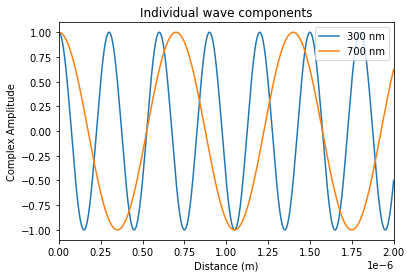

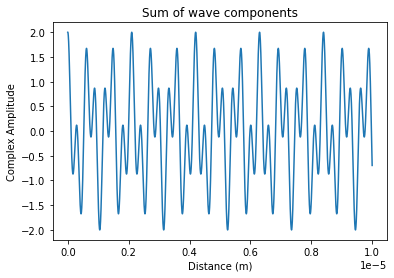

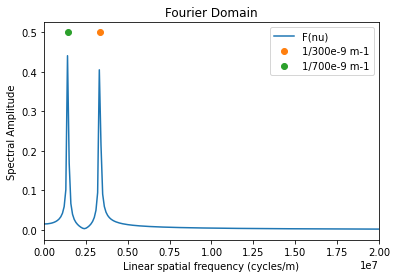

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#constants
x0=0 #m
xn=10e-6 #m
samp_int=1e-9 #m
x=np.arange(x0,xn,samp_int)
lam1=300e-9 #m, pick spatial frequencies on the order of visible light's wavelength
lam2=700e-9 #m
k1=2*np.pi/lam1 #angular spaital frequency, rad/m
k2=2*np.pi/lam2 #angular spaital frequency, rad/m

#create spatial harmonic functions
y1=np.exp(-1j*k1*x)
y2=np.exp(-1j*k2*x)
ytot=y1+y2

#examine individual waves
plt.figure(1)
plt.plot(x,y1.real,x,y2.real)
plt.title('Individual wave components')
plt.xlabel('Distance (m)')
plt.ylabel('Complex Amplitude')
plt.legend(['300 nm','700 nm'])
plt.xlim([0,0.2e-5])

#examine sum of waves
plt.figure(2)
plt.plot(x,ytot.real)
plt.title('Sum of wave components')
plt.xlabel('Distance (m)')
plt.ylabel('Complex Amplitude')

#calculate frequency axis
dpCount=len(ytot.real) #number of samples
values=np.arange(int(dpCount/2)) #create linear indices array half size of ytot
spatialPeriod=dpCount*samp_int #longest spatial period
freq=values/spatialPeriod # scale indices by inverse of period to get frequency

#take Fourier transform and see frequency components
sp=np.fft.fft(ytot.real)/len(ytot) #normalize by len(ytot)
sp=sp[range(int(len(ytot.real)/2))] #take only one side of the output

#Visualize Fourier components (positive values only, ignore phase for now)
plt.figure(3)
plt.plot(freq,np.abs(sp)) #plot magnitude of the frequency spectrum
plt.title('Fourier Domain')
plt.xlim([0,2e7])
plt.xlabel('Linear spatial frequency (cycles/m)')
plt.ylabel('Spectral Amplitude')
v1=k1/(2*np.pi)
v2=k2/(2*np.pi)
plt.plot(v1,0.5,'o',v2,0.5,'o')
plt.legend(['F(nu)','1/300e-9 m-1','1/700e-9 m-1'])

**Exercise 2: Fourier transforms in 2D** Let's extend our Fourier analysis to 2-D and see the diffraction pattern of a slit. **Create a 2D image of a slit and use the 2D fft** to visualize how different spatial frequencies composing the image of the slit are angularly dispersed by diffraction in the far-field. This pattern is the same pattern you can visualize in the back focal plane of a lens placed in the path of the diffracting light. Experiment with changing the aspect ratio of the slit and how the pattern changes.

Dealing with the 2D transform requires shifting and repositioning the spatial distribution before and after taking the FT. See https://thepythoncodingbook.com/2021/08/30/2d-fourier-transform-in-python-and-fourier-synthesis-of-images/ for an example.

Text(0.5, 1.0, 'Diffraction pattern intensity')

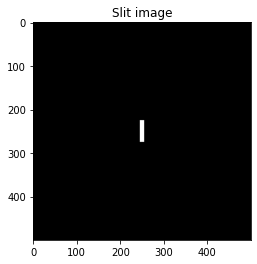

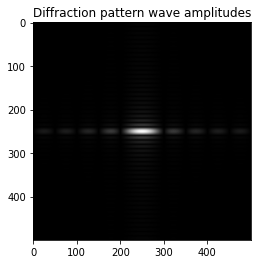

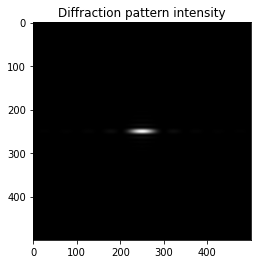

In [ ]:
from re import L
#constants
x=np.linspace(0,10e-3,500)
y=np.linspace(0,10e-3,500)
xx,yy=np.meshgrid(x,y)

#create slit
left=4.9e-3
right=5.1e-3
bottom=4.5e-3
top=5.5e-3
slit=(xx>left)*(xx<right)*(yy>bottom)*(yy<top) #logical operations to assign zeroes everywhere except the slit
plt.figure(1)
plt.imshow(slit,cmap='gray')
plt.title('Slit image')

#take Fourier transform to see diffraction pattern
ft=np.fft.ifftshift(slit) #make f(x,y) symmetric around (0,0)
ft=np.fft.fft2(ft) #take FT
ft=np.fft.ifftshift(ft) #shift back to center of image
plt.figure(2)
plt.imshow(np.abs(ft),cmap='gray')
plt.title('Diffraction pattern wave amplitudes')

plt.figure(3)
plt.imshow(np.square(np.abs(ft)),cmap='gray')
plt.title('Diffraction pattern intensity')